<a href="https://colab.research.google.com/github/lucassaquett/VRPTHW/blob/main/VRPSSTHW_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

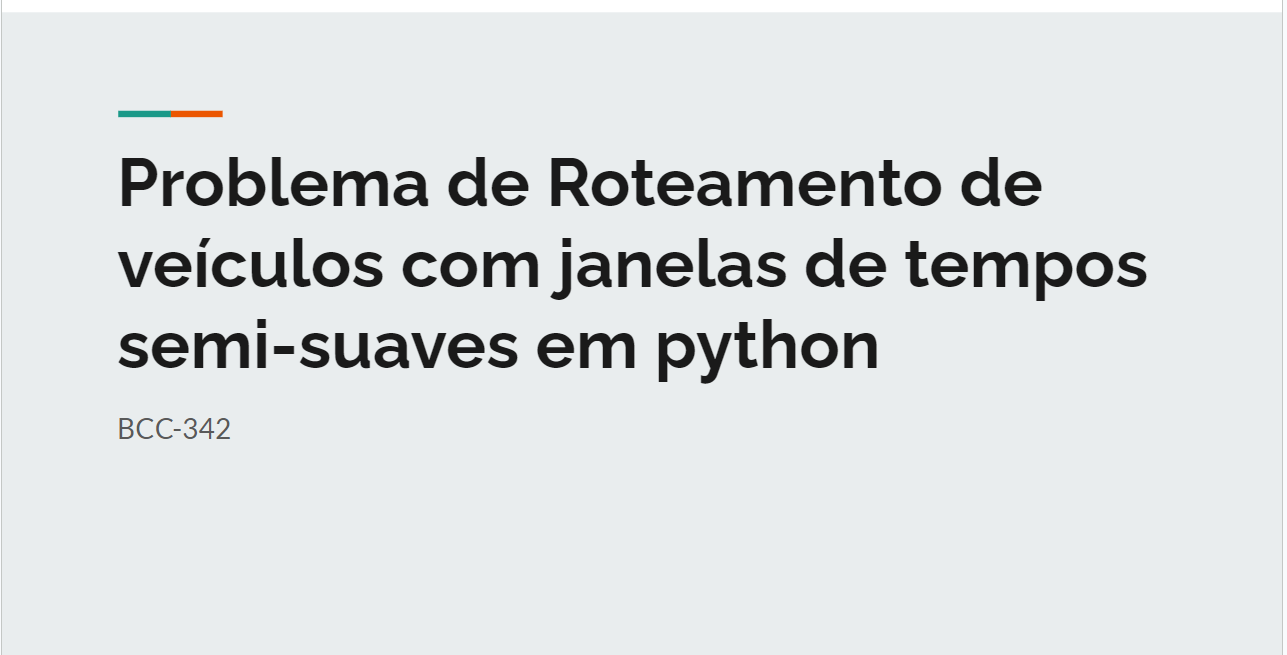

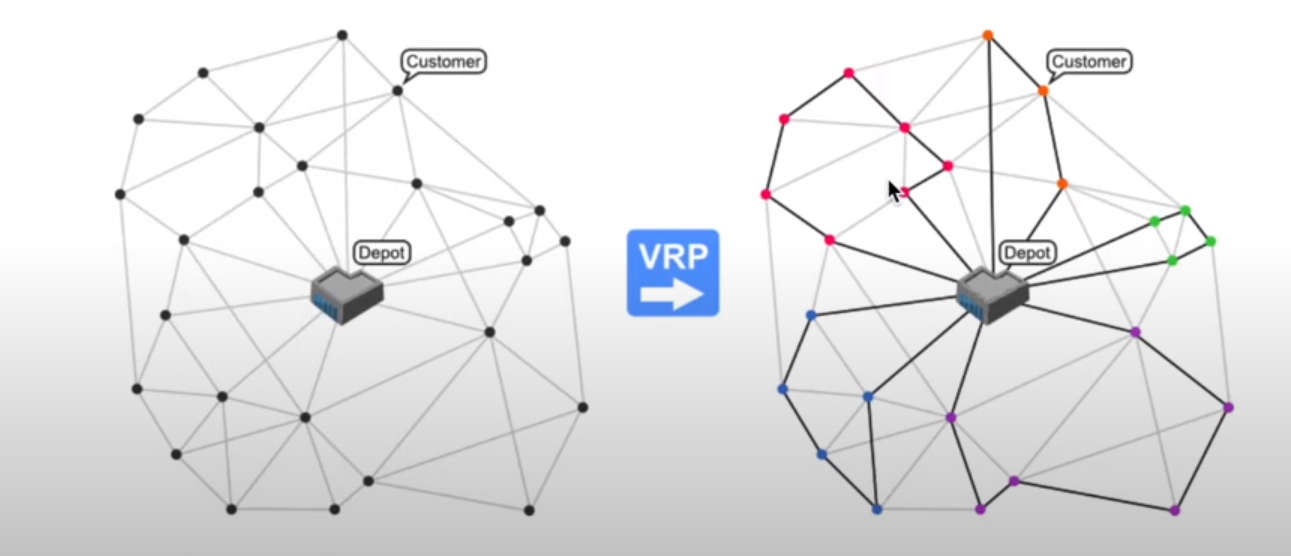

In [17]:
!pip install gurobipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


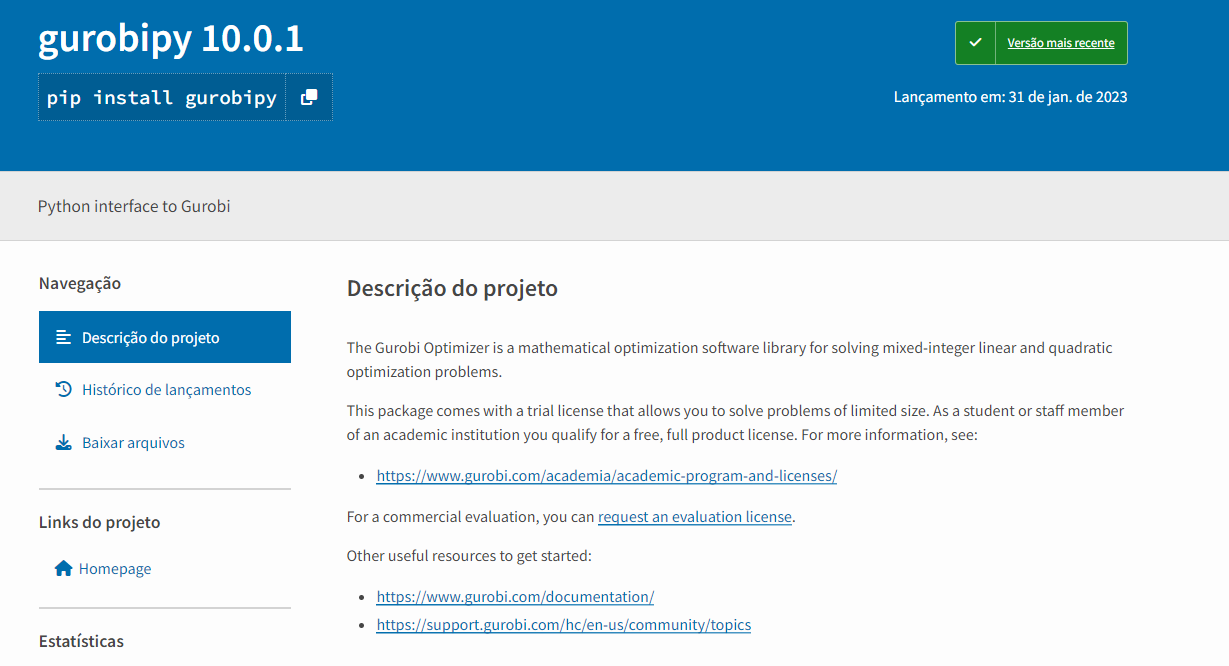

In [18]:
from gurobipy import*
import numpy as np

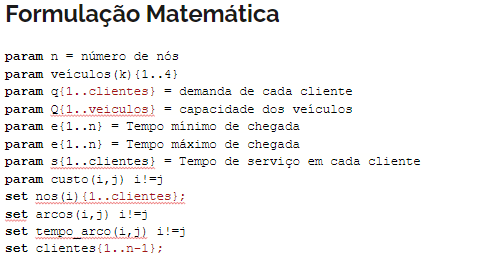

In [19]:
#Nos e arcos
n = 11
clientes = [ i for i in range(n) if i !=0 ] 
nos = [0]+clientes
for i in nos: print(str("cliente = ")+str([nos[i]]))

arcos=[(i,j) for i in nos for j in nos if i!=j]
print(str("\n\n"))
for i in arcos : print(str("Arcos = ")+str(arcos))

#Demanda
q={n:np.random.randint(10,15) for n in clientes}
q[0]=0
print(str("\n\n"))
for i in q : print(str("deman = ")+str(q))

#Janelas de tempo
e={0:0, 1:10, 2:10, 3:10, 4:20, 5:20, 6:20, 7:40, 8:40, 9:40, 10:40} #Tempo minimo de chegada
l={0:200, 1:100, 2:100, 3:100, 4:150, 5:150, 6:150, 7:180, 8:180, 9:180, 10:180} #tempo maximo de chegada

s={n:np.random.randint(3,5) for n in clientes } #tempo de serviço
s[0] = 0
print(str("\n\n"))
for i in s : print(str("tempo de se = ")+str(s))

#Veiculos
veiculos = [1,2,3,4]
#q=50
Q={1:50,2:50,3:25,4:25}

X=np.random.rand(len(nos))*100
Y=np.random.rand(len(nos))*100

custo = {(i,j) : np.hypot(X[i]-X[j],Y[i]-Y[j]) for i in nos for j in nos if i != j}
tempo_arco = {(i,j) : np.hypot(X[i]-X[j],Y[i]-Y[j]) for i in nos for j in nos if i != j}
print(str("\n\n"))
for i in custo : print(str("custo = ")+str(custo))

cliente = [0]
cliente = [1]
cliente = [2]
cliente = [3]
cliente = [4]
cliente = [5]
cliente = [6]
cliente = [7]
cliente = [8]
cliente = [9]
cliente = [10]



Arcos = [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (1, 0), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (2, 0), (2, 1), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (3, 0), (3, 1), (3, 2), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (4, 0), (4, 1), (4, 2), (4, 3), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 7), (6, 8), (6, 9), (6, 10), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 8), (7, 9), (7, 10), (8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 9), (8, 10), (9, 0), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 10), (10, 0), (10, 1), (10, 

In [20]:
model = Model('VRPSSTW')

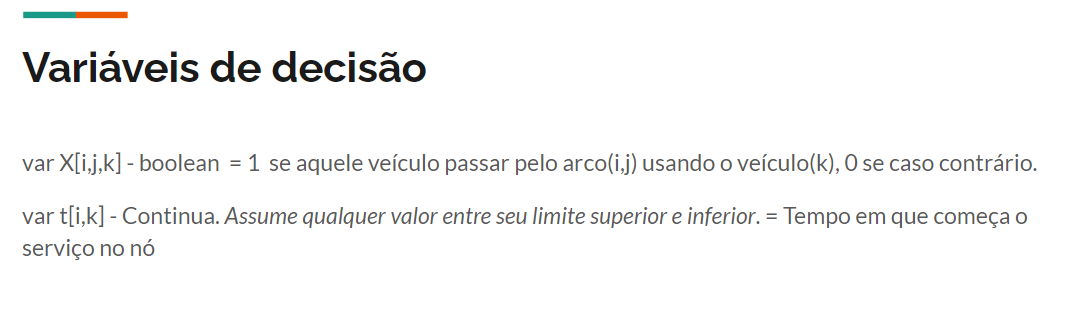

In [21]:
#Variaveis de decições

arco = [(i,j,k) for i in nos for j in nos for k in veiculos if i!=j ]
tempos_de_servico = [(i,k) for i in nos for k in veiculos]
x = model.addVars(arco, vtype=GRB.BINARY, name = 'x')
t = model.addVars(tempos_de_servico, vtype=GRB.CONTINUOUS, name = 't')

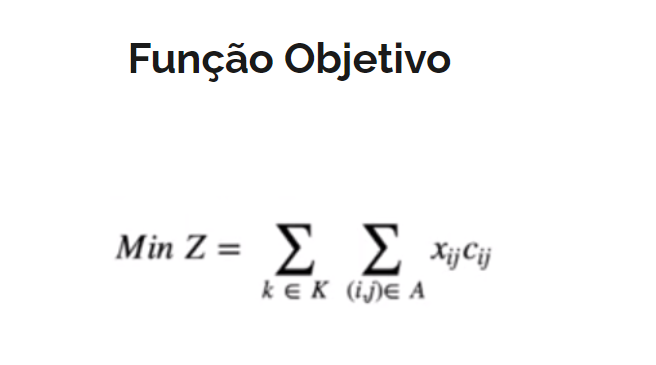

In [22]:
model.setObjective(quicksum(custo[i,j]*x[i,j,k] for i,j,k in arco), GRB.MINIMIZE)

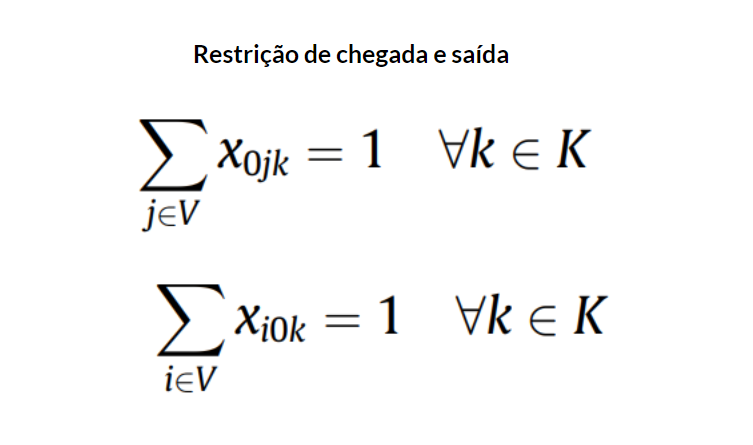

In [23]:
#Restrições de chega e saída
model.addConstrs(quicksum(x[0,j,k] for j in clientes) == 1 for k in veiculos)
model.addConstrs(quicksum(x[i,0,k] for i in clientes) == 1 for k in veiculos)

{1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>}

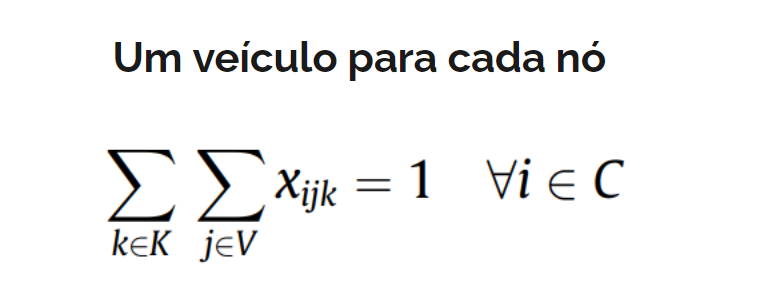

In [24]:
#Um veiuclo para cada nó
model.addConstrs(quicksum(x[i,j,k] for j in nos for k in veiculos if i!=j) == 1 for i in clientes)

{1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>,
 5: <gurobi.Constr *Awaiting Model Update*>,
 6: <gurobi.Constr *Awaiting Model Update*>,
 7: <gurobi.Constr *Awaiting Model Update*>,
 8: <gurobi.Constr *Awaiting Model Update*>,
 9: <gurobi.Constr *Awaiting Model Update*>,
 10: <gurobi.Constr *Awaiting Model Update*>}

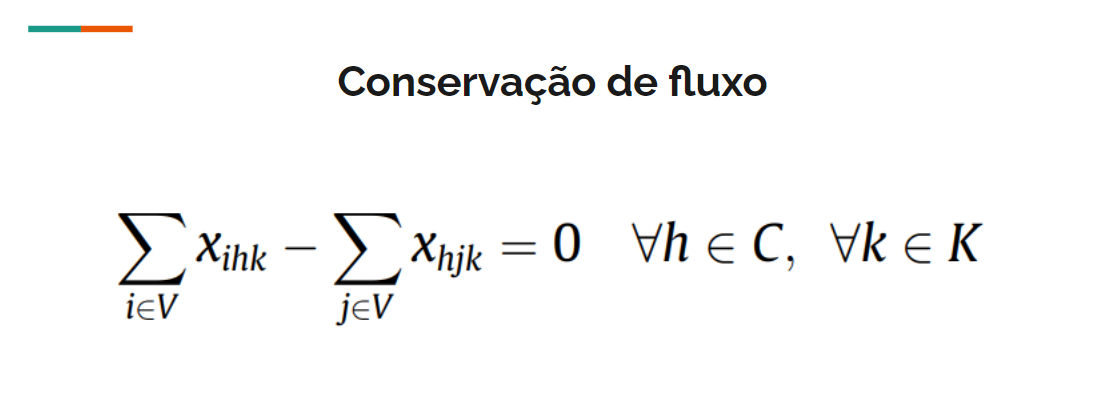

In [30]:
#Conservação de fluxo
model.addConstrs(quicksum(x[i,j,k] for j in nos if i!=j) - quicksum(x[j,i,k] for j in nos if i!=j) == 0 for i in nos for k in veiculos)

{(0, 1): <gurobi.Constr *Awaiting Model Update*>,
 (0, 2): <gurobi.Constr *Awaiting Model Update*>,
 (0, 3): <gurobi.Constr *Awaiting Model Update*>,
 (0, 4): <gurobi.Constr *Awaiting Model Update*>,
 (1, 1): <gurobi.Constr *Awaiting Model Update*>,
 (1, 2): <gurobi.Constr *Awaiting Model Update*>,
 (1, 3): <gurobi.Constr *Awaiting Model Update*>,
 (1, 4): <gurobi.Constr *Awaiting Model Update*>,
 (2, 1): <gurobi.Constr *Awaiting Model Update*>,
 (2, 2): <gurobi.Constr *Awaiting Model Update*>,
 (2, 3): <gurobi.Constr *Awaiting Model Update*>,
 (2, 4): <gurobi.Constr *Awaiting Model Update*>,
 (3, 1): <gurobi.Constr *Awaiting Model Update*>,
 (3, 2): <gurobi.Constr *Awaiting Model Update*>,
 (3, 3): <gurobi.Constr *Awaiting Model Update*>,
 (3, 4): <gurobi.Constr *Awaiting Model Update*>,
 (4, 1): <gurobi.Constr *Awaiting Model Update*>,
 (4, 2): <gurobi.Constr *Awaiting Model Update*>,
 (4, 3): <gurobi.Constr *Awaiting Model Update*>,
 (4, 4): <gurobi.Constr *Awaiting Model Update*>,


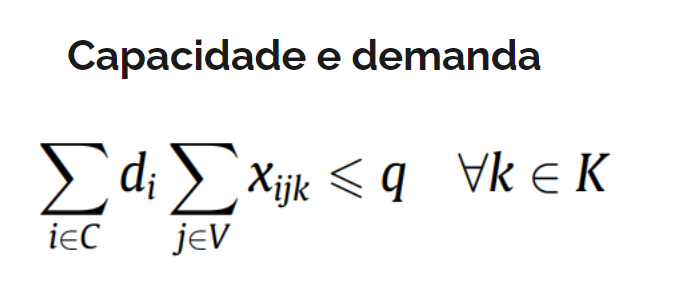

In [31]:
#Capacidade do veiculo
model.addConstrs(quicksum(q[i]*quicksum(x[i,j,k] for j in nos if i!=j) for i in clientes)<=Q[k] for k in veiculos)

{1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>}

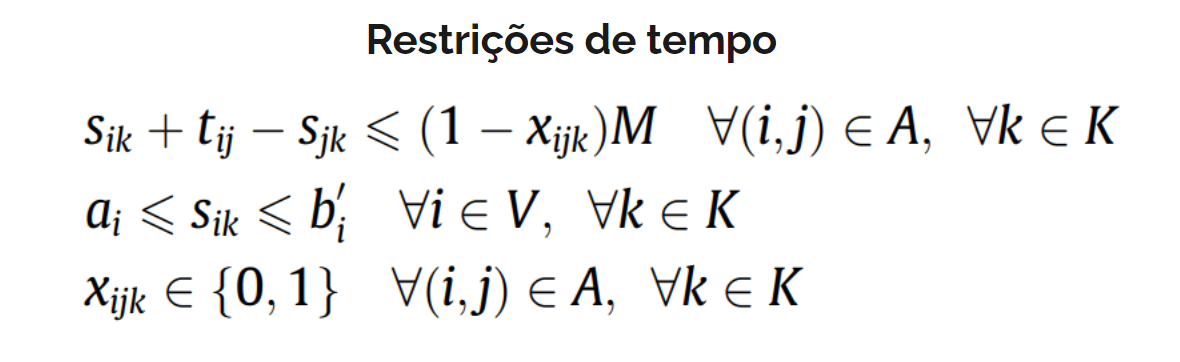

In [32]:
#Restrições de tempo
model.addConstrs((x[i,j,k] == 1)>> (t[i,k]+s[i]+tempo_arco[i,j] == t[j,k]) for i in clientes for j in clientes for k in veiculos if i!=j)
model.addConstrs(t[i,k] >= e[i] for i,k in tempos_de_servico)
model.addConstrs(t[i,k] <= l[i] for i,k in tempos_de_servico)

{(0, 1): <gurobi.Constr *Awaiting Model Update*>,
 (0, 2): <gurobi.Constr *Awaiting Model Update*>,
 (0, 3): <gurobi.Constr *Awaiting Model Update*>,
 (0, 4): <gurobi.Constr *Awaiting Model Update*>,
 (1, 1): <gurobi.Constr *Awaiting Model Update*>,
 (1, 2): <gurobi.Constr *Awaiting Model Update*>,
 (1, 3): <gurobi.Constr *Awaiting Model Update*>,
 (1, 4): <gurobi.Constr *Awaiting Model Update*>,
 (2, 1): <gurobi.Constr *Awaiting Model Update*>,
 (2, 2): <gurobi.Constr *Awaiting Model Update*>,
 (2, 3): <gurobi.Constr *Awaiting Model Update*>,
 (2, 4): <gurobi.Constr *Awaiting Model Update*>,
 (3, 1): <gurobi.Constr *Awaiting Model Update*>,
 (3, 2): <gurobi.Constr *Awaiting Model Update*>,
 (3, 3): <gurobi.Constr *Awaiting Model Update*>,
 (3, 4): <gurobi.Constr *Awaiting Model Update*>,
 (4, 1): <gurobi.Constr *Awaiting Model Update*>,
 (4, 2): <gurobi.Constr *Awaiting Model Update*>,
 (4, 3): <gurobi.Constr *Awaiting Model Update*>,
 (4, 4): <gurobi.Constr *Awaiting Model Update*>,


In [33]:
model.optimize()

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (linux64)

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 290 rows, 484 columns and 2336 nonzeros
Model fingerprint: 0x2793de10
Model has 720 general constraints
Variable types: 44 continuous, 440 integer (440 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [8e+00, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+02]
  GenCon rhs range [1e+01, 8e+01]
  GenCon coe range [1e+00, 1e+00]

MIP start from previous solve did not produce a new incumbent solution
MIP start from previous solve violates constraint R158 by 1.000000000

Presolve added 366 rows and 46 columns
Presolve time: 0.09s
Presolved: 656 rows, 530 columns, 5613 nonzeros
Variable types: 114 continuous, 416 integer (416 binary)

Root relaxation: objective 5.155713e+02, 87 iterations, 0.00 seconds 

In [34]:
print("Função Objetivo: ",str(round(model.ObjVal,2)))
for v in model.getVars():
  if v.x > 0.9:
    print(str(v.VarName)+"="+str(v.x))

Função Objetivo:  565.97
x[0,4,1]=1.0
x[0,6,2]=1.0
x[0,7,3]=1.0
x[0,8,4]=1.0
x[1,10,1]=1.0
x[2,9,2]=1.0
x[3,1,1]=1.0
x[4,3,1]=1.0
x[5,0,2]=1.0
x[6,2,2]=1.0
x[7,0,3]=1.0
x[8,0,4]=1.0
x[9,5,2]=1.0
x[10,0,1]=1.0
t[1,1]=91.03412938653112
t[1,2]=100.0
t[1,3]=100.0
t[1,4]=10.0
t[2,1]=100.0
t[2,2]=100.0
t[2,3]=100.0
t[2,4]=10.0
t[3,1]=54.3683718341104
t[3,2]=100.0
t[3,3]=100.0
t[3,4]=10.0
t[4,1]=20.0
t[4,2]=20.0
t[4,3]=20.0
t[4,4]=20.0
t[5,1]=20.0
t[5,2]=140.99049129582642
t[5,3]=20.000000000000004
t[5,4]=20.000000000000004
t[6,1]=19.99999999999997
t[6,2]=65.05684792171998
t[6,3]=20.0
t[6,4]=20.0
t[7,1]=40.0
t[7,2]=40.0
t[7,3]=40.0
t[7,4]=40.0
t[8,1]=40.0
t[8,2]=39.99999999999996
t[8,3]=40.0
t[8,4]=40.0
t[9,1]=39.999999999999986
t[9,2]=121.0424948723199
t[9,3]=40.0
t[9,4]=40.0
t[10,1]=113.34889658933326
t[10,2]=40.0
t[10,3]=40.0
t[10,4]=40.0
